# Gesture Classification
### Classifier: K Nearest Neighbours
### Accuracy: 70%

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [2]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
#     classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    #fig.tight_layout()
    plt.show()
    return ax

In [3]:
data = pd.read_csv('../Desktop_Software/data/dataset.csv')
gestures = ['Come Here','Go Away','Fist','Finger Crossed','Cash','One','Two','Three','Four','Five','Excellent','Stop','Thumbs Up','Thumbs Down']
data.columns = ['1', '2', '3', '4', '5', 'x', 'y', 'z', 'gesture']
train_data = shuffle(data, random_state=42)
train_data = data;
train_data.head()

,1,2,3,4,5,x,y,z,gesture
0,-2.0,-4.0,-18.0,0.0,8.0,89.0,6.722235,6.360457,Come Here
1,-2.0,0.0,-16.0,2.0,12.0,89.0,6.700003,6.466939,Come Here
2,-8.0,-8.0,-18.0,0.0,12.0,89.0,6.635451,6.367587,Come Here
3,2.0,8.0,-8.0,8.0,12.0,89.0,0.968758,5.642951,Come Here
4,10.0,8.0,-8.0,8.0,12.0,89.0,2.179462,6.292349,Come Here


In [4]:
X = train_data.drop(columns=['gesture'])
y = train_data['gesture']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
clf = KNeighborsClassifier(n_neighbors=3);
clf.fit(X_train, y_train);

In [12]:
print(clf.score(X_test, y_test)*100 , "%")

99.52830188679245 %


In [8]:
y_pred = clf.predict(X_test)

Confusion matrix, without normalization
[[ 91   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  91   0   0   0   0   0   1   0   0   0   0   0   0]
 [  0   0  89   0   0   0   0   0   0   0   0   0   0   0]
 [  2   1   0  88   1   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 106   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  76   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  94   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 108   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  78   0   0   0   0   0]
 [  0   0   0   0   0   1   0   0   0  92   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  94   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  84   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  85   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  90]]


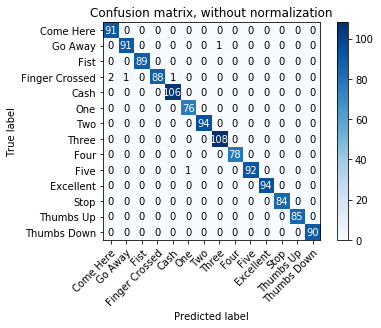

In [9]:
plot_confusion_matrix(y_test, y_pred, classes=gestures, title='Confusion matrix, without normalization')